# OPTIMAL CASE STUDY: Microscopic image cell segmentation and statistical analysis

---

## Scientific question, analysis methods, and expected outputs

Cellular morphology is an indicator of a physiological state of the cell, and a well-segmented image can capture biologically relevant morphological information. In this session, we will instruct ChatGPT to segment cell structures from microscopic images and conduct statistical analysis based on the segmentation results, such as counting cell numbers, calculating histogram, etc. 

We segment the microscopic images using the Otsu thresholding algorithm. Since the microscopic images exhibit non-uniform intensity distribution, histogram equalization preprocessing is performed before the segmentation. Result of the pre-processed image and the segmentation mask will be compared with the original microscopic image by visualization.

## Coding language(s)
- Python
- Tools to be used: numpy, opencv, and matplotlib.

## LLM
- GPT-4

## Image Credit
[Skala Lab](https://morgridge.org/research/labs/skala/)

---

## PREREQUISITE KNOWLEDGE

1. Have a good understanding of what is microscopic image, and key steps involved in this specific data analysis task. ChatGPT may be used to provide some hints on this by prompts such as “What is microscopic image?” and “Given a microscopic cell image file, illustrate the key steps of segmentation and statistical analysis of cell structures.”

2. Ensure necessary Python packages are installed, including numpy, opencv, and matplotlib.

3. Ensure relevant input files are available: one microscopic image file (stored in *.png format).

4. For beginners in computer programming, know how to read and run Python scripts. For others with programming experience, know how to write and modify Python code.

---

## Define Role

Act as an experienced bioinformatician proficient in microscopic cell image analysis, you will assist me by writing code with number of lines as minimal as possible. Reset the thread if asked to.
Reply “YES” if understand.

---

## Iteration 0

**Prompt**

I have one microscopic image file “tcells_n.png”. Read in the image, perform histogram equalization, segment the cells in the processed image using Otsu thresholding, and then display the original image, the image after histogram equalization, and the segmentation mask in one window. Tools to use: numpy, opencv, and matplotlib. Please draft the code in Python.

---
ChatGPT:

_Here's a minimal code example to accomplish your task using numpy, OpenCV, and matplotlib:_

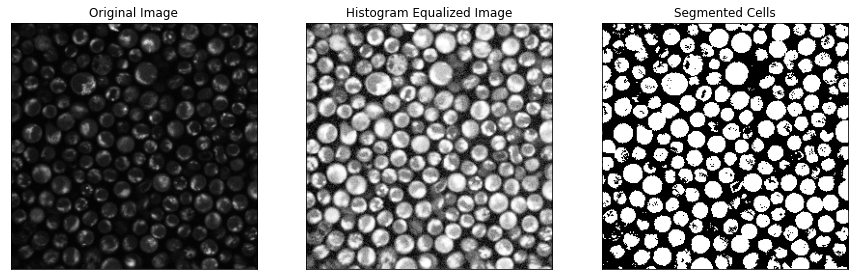

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('tcells_n.png', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Segment the cells using Otsu thresholding
_, thresholded_image = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(equalized_image, cmap='gray')
axs[1].set_title('Histogram Equalized Image')
axs[2].imshow(thresholded_image, cmap='gray')
axs[2].set_title('Segmented Cells')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


ChatGPT: 

_This code will read the image_ "tcells_n.png", _apply histogram equalization, segment the cells using Otsu thresholding, and display the original, equalized, and segmented images side-by-side in a single window._

---

## Iteration 1

**Prompt**

The cells are segmented out. Now I need to separate the cells into individual cells. Apply connected component analysis.

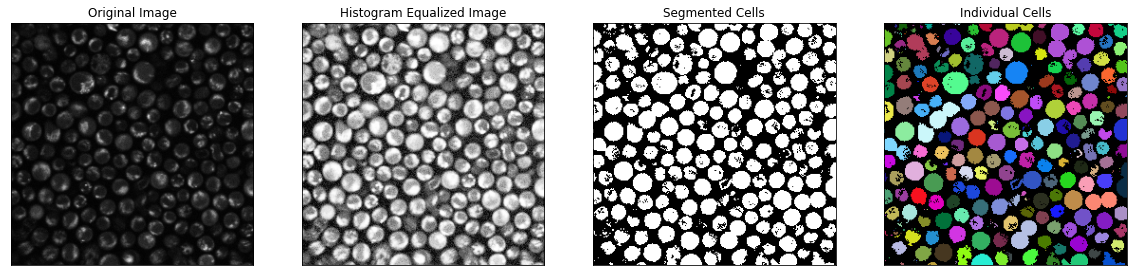

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('tcells_n.png', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Segment the cells using Otsu thresholding
_, thresholded_image = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply connected component analysis
num_labels, labeled_image = cv2.connectedComponents(thresholded_image)

# Generate a random color map for displaying the individual cells
colors = np.random.randint(0, 256, (num_labels, 3), dtype=np.uint8)
colors[0] = [0, 0, 0]  # Set background color to black
colored_cells = colors[labeled_image]

# Display the images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(equalized_image, cmap='gray')
axs[1].set_title('Histogram Equalized Image')
axs[2].imshow(thresholded_image, cmap='gray')
axs[2].set_title('Segmented Cells')
axs[3].imshow(colored_cells)
axs[3].set_title('Individual Cells')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


ChatGPT:

_This code adds connected component analysis to the previous example and generates a color map to visualize individual cells. It then displays the original image, equalized image, segmented cells, and individual cells in a single window._

---

## Iteration 2

**Prompt**

There are many cells touching each other and the above code cannot separate them. Apply morphological open using 5x5 elements before connected component analysis.

ChatGPT:
    
_To apply morphological opening with a 5x5 structuring element before connected component analysis, you can update the code as follows:_

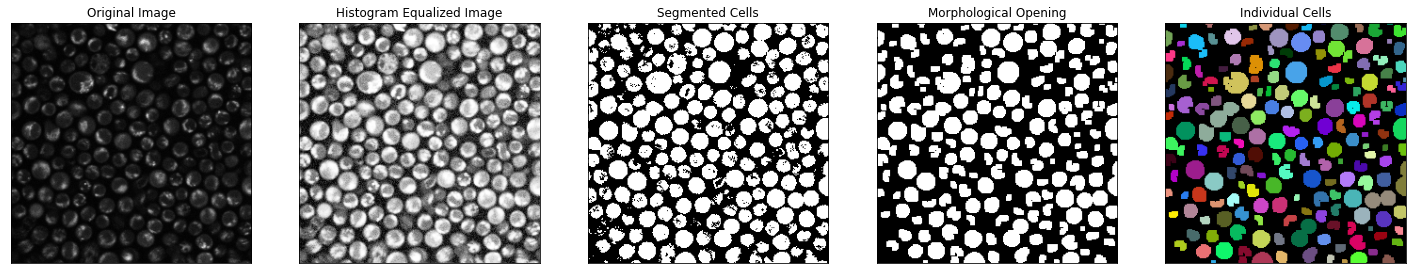

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('tcells_n.png', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Segment the cells using Otsu thresholding
_, thresholded_image = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological opening with a 5x5 structuring element
kernel = np.ones((5, 5), np.uint8)
opened_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_OPEN, kernel)

# Apply connected component analysis
num_labels, labeled_image = cv2.connectedComponents(opened_image)

# Generate a random color map for displaying the individual cells
colors = np.random.randint(0, 256, (num_labels, 3), dtype=np.uint8)
colors[0] = [0, 0, 0]  # Set background color to black
colored_cells = colors[labeled_image]

# Display the images
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(equalized_image, cmap='gray')
axs[1].set_title('Histogram Equalized Image')
axs[2].imshow(thresholded_image, cmap='gray')
axs[2].set_title('Segmented Cells')
axs[3].imshow(opened_image, cmap='gray')
axs[3].set_title('Morphological Opening')
axs[4].imshow(colored_cells)
axs[4].set_title('Individual Cells')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


ChatGPT:
    
_This code applies morphological opening using a 5x5 structuring element to the thresholded image before performing connected component analysis. This operation helps separate touching cells. The resulting images are displayed in a single window, including the original image, equalized image, segmented cells, morphological opening result, and individual cells._

---

## Iteration 3

**Prompt**

5x5 causes missing some smaller cells. Try using smaller element size but still separating the touching cells.

ChatGPT:
    
_You can try using a smaller structuring element, such as 3x3, to perform morphological opening while preserving smaller cells. Here's the updated code:_

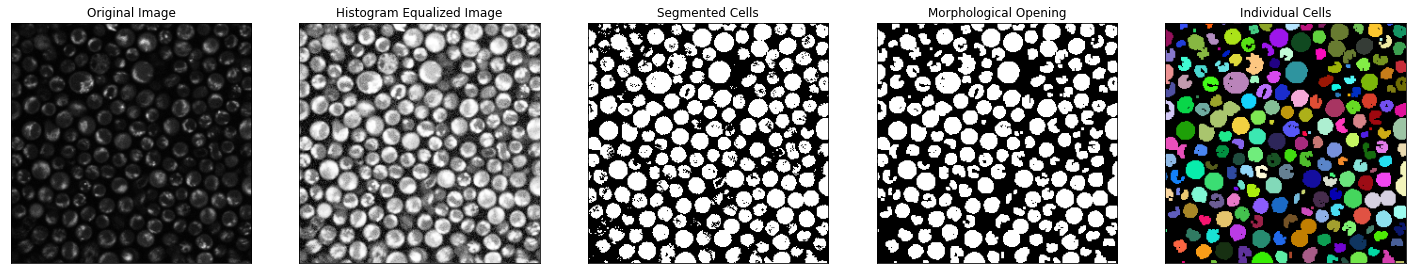

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('tcells_n.png', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Segment the cells using Otsu thresholding
_, thresholded_image = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological opening with a 5x5 structuring element
kernel = np.ones((3, 3), np.uint8)
opened_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_OPEN, kernel)

# Apply connected component analysis
num_labels, labeled_image = cv2.connectedComponents(opened_image)

# Generate a random color map for displaying the individual cells
colors = np.random.randint(0, 256, (num_labels, 3), dtype=np.uint8)
colors[0] = [0, 0, 0]  # Set background color to black
colored_cells = colors[labeled_image]

# Display the images
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(equalized_image, cmap='gray')
axs[1].set_title('Histogram Equalized Image')
axs[2].imshow(thresholded_image, cmap='gray')
axs[2].set_title('Segmented Cells')
axs[3].imshow(opened_image, cmap='gray')
axs[3].set_title('Morphological Opening')
axs[4].imshow(colored_cells)
axs[4].set_title('Individual Cells')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

ChatGPT:

_This code uses a 3x3 structuring element for morphological opening, which should help preserve smaller cells while still separating touching cells._


---

## Iteration 4

**Prompt**

But 3x3 structuring element cannot separate the touching cells. Without losing any cells, what is the next possible way to do it?

ChatGPT:
    
_One possible approach to separate touching cells without losing any cells is to apply the watershed algorithm. It is a powerful image segmentation method that can be used to separate touching cells. Here's the updated code using the watershed algorithm:_

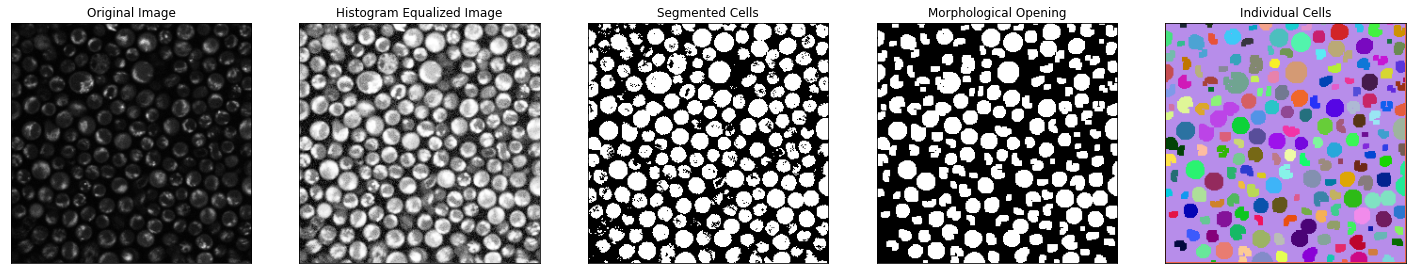

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('tcells_n.png', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Segment the cells using Otsu thresholding
_, thresholded_image = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological opening with a 3x3 structuring element
kernel = np.ones((3, 3), np.uint8)
opened_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Distance transform and normalization
dist_transform = cv2.distanceTransform(opened_image, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.05 * dist_transform.max(), 255, 0)

# Subtract the sure foreground area from the original image
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(opened_image, sure_fg)

# Marker labelling
num_labels, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels to distinguish sure regions
markers = markers + 1

# Mark the unknown regions with 0
markers[unknown == 255] = 0

# Apply the watershed algorithm
cv2.watershed(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), markers)

# Generate a random color map for displaying the individual cells
colors = np.random.randint(0, 256, (num_labels + 1, 3), dtype=np.uint8)
colors[0] = [0, 0, 0]  # Set background color to black
colored_cells = colors[markers]

# Display the images
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(equalized_image, cmap='gray')
axs[1].set_title('Histogram Equalized Image')
axs[2].imshow(thresholded_image, cmap='gray')
axs[2].set_title('Segmented Cells')
axs[3].imshow(opened_image, cmap='gray')
axs[3].set_title('Morphological Opening')
axs[4].imshow(colored_cells)
axs[4].set_title('Individual Cells')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


ChatGPT:

_This code uses the watershed algorithm after morphological opening to separate touching cells without losing any cells. The algorithm first computes a distance transformation, then applies a threshold to obtain sure foreground areas. It then subtracts these areas from the original image to determine the unknown regions. Finally, it applies the watershed algorithm to markers created from the connected components of the sure foreground areas._

---

## Iteration 5

**Prompt**

Now this is getting much better. Try to remove morphological open and remain the rest of the workflow.

ChatGPT:

_Sure, let's remove the morphological opening step and see how the watershed algorithm performs without it. Here's the updated code:_

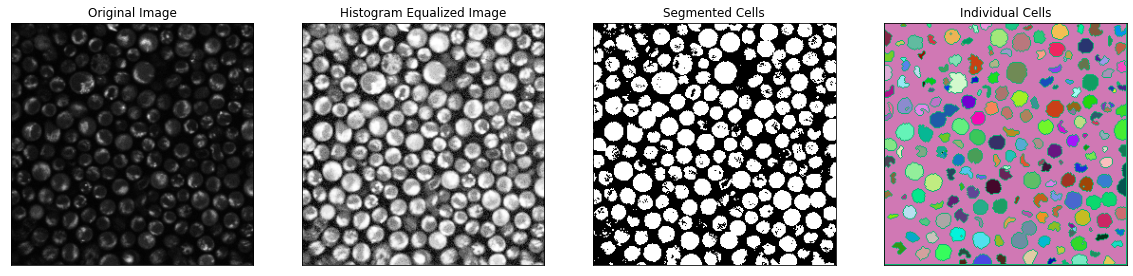

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('tcells_n.png', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Segment the cells using Otsu thresholding
_, thresholded_image = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Distance transform and normalization
dist_transform = cv2.distanceTransform(thresholded_image, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.25 * dist_transform.max(), 255, 0)

# Subtract the sure foreground area from the original image
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresholded_image, sure_fg)

# Marker labelling
num_labels, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels to distinguish sure regions
markers = markers + 1

# Mark the unknown regions with 0
markers[unknown == 255] = 0

# Apply the watershed algorithm
cv2.watershed(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), markers)

# Generate a random color map for displaying the individual cells
colors = np.random.randint(0, 256, (num_labels + 1, 3), dtype=np.uint8)
colors[0] = [0, 0, 0]  # Set background color to black
colored_cells = colors[markers]

# Display the images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(equalized_image, cmap='gray')
axs[1].set_title('Histogram Equalized Image')
axs[2].imshow(thresholded_image, cmap='gray')
axs[2].set_title('Segmented Cells')
axs[3].imshow(colored_cells)
axs[3].set_title('Individual Cells')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()
